In [1]:
## 4th Order Runge-Kutta Method ##
def RK4(f):
    return lambda t, y, dt: (
            lambda dy1: (
            lambda dy2: (
            lambda dy3: (
            lambda dy4: (dy1 + 2*dy2 + 2*dy3 + dy4)/6
            )( dt * f( t + dt  , y + dy3   ) )
            )( dt * f( t + dt/2, y + dy2/2 ) )
            )( dt * f( t + dt/2, y + dy1/2 ) )
            )( dt * f( t       , y         ) )
 
def theory(t): return (t**2 + 4)**2 /16
 
from math import sqrt
dy = RK4(lambda t, y: t*sqrt(y))
 
t, y, dt = 0., 1., .1
while t <= 10:
    if abs(round(t) - t) < 1e-5:
        print("y(%2.1f)\t= %4.6f \t error: %4.6g" % ( t, y, abs(y - theory(t))))
    t, y = t + dt, y + dy( t, y, dt )

y(0.0)	= 1.000000 	 error:    0
y(1.0)	= 1.562500 	 error: 1.45722e-07
y(2.0)	= 3.999999 	 error: 9.19479e-07
y(3.0)	= 10.562497 	 error: 2.90956e-06
y(4.0)	= 24.999994 	 error: 6.23491e-06
y(5.0)	= 52.562489 	 error: 1.08197e-05
y(6.0)	= 99.999983 	 error: 1.65946e-05
y(7.0)	= 175.562476 	 error: 2.35177e-05
y(8.0)	= 288.999968 	 error: 3.15652e-05
y(9.0)	= 451.562459 	 error: 4.07232e-05
y(10.0)	= 675.999949 	 error: 5.09833e-05


In [2]:
## Runge-Kutta-Merson Method ##
def RKM5(f):
    return lambda t, y, dt: (
            lambda dy1: (
            lambda dy2: (
            lambda dy3: (
            lambda dy4: (
            lambda dy5: (dy1 + 4*dy4 + dy5)/6
            )( dt * f( t + dt, y + (dy1-3*dy3+4*dy4)/2 ) )
            )( dt * f( t + dt/2, y + (dy1+3*dy3)/8 ) )
            )( dt * f( t + dt/3, y + (dy1+dy2)/6 ) )
            )( dt * f( t + dt/3, y + dy1/3 ) )
            )( dt * f( t       , y         ) )
 
def theory(t): return (t**2 + 4)**2/16
 
from math import sqrt
dy = RKM5(lambda t, y: t*sqrt(y)) # ODE function y'(t)
 
t, y, dt = 0., 1., .1 # input initial conditions
while t <= 10:
    if abs(round(t) - t) < 1e-5:
        print("y(%2.1f)\t= %4.6f \t error: %4.6g" % ( t, y, abs(y - theory(t))))
    t, y = t + dt, y + dy( t, y, dt )

y(0.0)	= 1.000000 	 error:    0
y(1.0)	= 1.562500 	 error: 6.96001e-08
y(2.0)	= 4.000000 	 error: 2.66483e-07
y(3.0)	= 10.562499 	 error: 5.94533e-07
y(4.0)	= 24.999999 	 error: 1.05514e-06
y(5.0)	= 52.562498 	 error: 1.64805e-06
y(6.0)	= 99.999998 	 error: 2.37298e-06
y(7.0)	= 175.562497 	 error: 3.2298e-06
y(8.0)	= 288.999996 	 error: 4.21843e-06
y(9.0)	= 451.562495 	 error: 5.33887e-06
y(10.0)	= 675.999993 	 error: 6.59109e-06


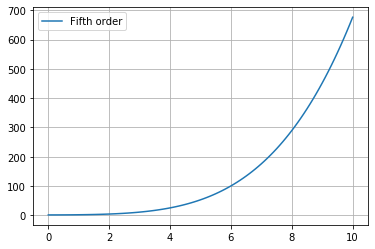

In [4]:
## Plotting ##
import matplotlib.pyplot as plt

def RKM5(func, tspan, steps, y0):
    dy = [0] * (steps + 1)
    t  = [0] * (steps + 1)
    dy[0] = y  = y0
    t[0]  = ti = tspan[0] 
    h = (tspan[1] - tspan[0]) / float(steps)

    for i in range(1, steps + 1):
            k1 = func(ti    , y                 )*h
            k2 = func(ti+h/3, y+k1/3            )*h
            k3 = func(ti+h/3, y+(k1+k2)/6       )*h
            k4 = func(ti+h/2, y+(k1+3*k3)/8     )*h
            k5 = func(ti+h  , y+(k1-3*k3+4*k4)/2)*h
            t[i]  = ti = tspan[0]+i*h
            dy[i] = y  = y+(k1+4*k4+k5)/6
    return(dy, t)

## Usage Example ##
function = lambda t, y: t*sqrt(y)  # ODE function y'(t)
tspan = [0 , 10]
steps = 100
y0 = 1  # input initial conditions
y, t = RKM5(function, tspan, steps, y0)

plt.plot(t, y, '-')
plt.legend(('Fifth order',))
plt.grid('on')
plt.show()

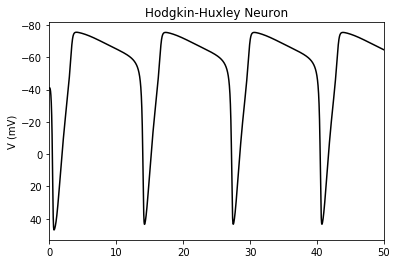

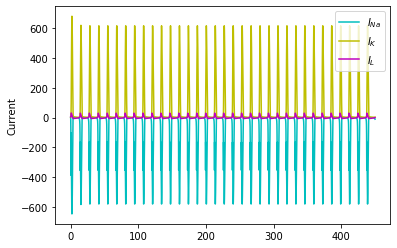

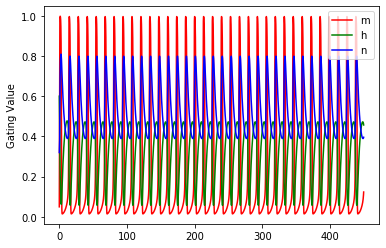

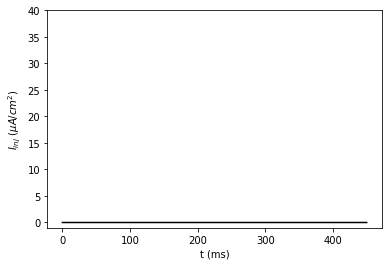

In [5]:
import scipy as sp
import pylab as plt
from scipy.integrate import odeint

class HodgkinHuxley():
    """Full Hodgkin-Huxley Model implemented in Python"""

    C_m  =   1.0
    """membrane capacitance, in uF/cm^2"""

    g_Na = 120.0
    """Sodium (Na) maximum conductances, in mS/cm^2"""

    g_K  =  36.0
    """Postassium (K) maximum conductances, in mS/cm^2"""

    g_L  =   0.3
    """Leak maximum conductances, in mS/cm^2"""

    E_Na =  50.0
    """Sodium (Na) Nernst reversal potentials, in mV"""

    E_K  = -77.0
    """Postassium (K) Nernst reversal potentials, in mV"""

    E_L  = -54.387
    """Leak Nernst reversal potentials, in mV"""

    t = sp.arange(0.0, 450.0, 0.01)
    """ The time to integrate over """

    def alpha_m(self, V):
        """Channel gating kinetics. Functions of membrane voltage"""
        return 0.1*(V+40.0)/(1.0 - sp.exp(-(V+40.0) / 10.0))

    def beta_m(self, V):
        """Channel gating kinetics. Functions of membrane voltage"""
        return 4.0*sp.exp(-(V+65.0) / 18.0)

    def alpha_h(self, V):
        """Channel gating kinetics. Functions of membrane voltage"""
        return 0.07*sp.exp(-(V+65.0) / 20.0)

    def beta_h(self, V):
        """Channel gating kinetics. Functions of membrane voltage"""
        return 1.0/(1.0 + sp.exp(-(V+35.0) / 10.0))

    def alpha_n(self, V):
        """Channel gating kinetics. Functions of membrane voltage"""
        return 0.01*(V+55.0)/(1.0 - sp.exp(-(V+55.0) / 10.0))

    def beta_n(self, V):
        """Channel gating kinetics. Functions of membrane voltage"""
        return 0.125*sp.exp(-(V+65) / 80.0)

    def I_Na(self, V, m, h):
        """
        Membrane current (in uA/cm^2)
        Sodium (Na = element name)
        |  :param V:
        |  :param m:
        |  :param h:
        |  :return:
        """
        return self.g_Na * m**3 * h * (V - self.E_Na)

    def I_K(self, V, n):
        """
        Membrane current (in uA/cm^2)
        Potassium (K = element name)
        |  :param V:
        |  :param h:
        |  :return:
        """
        return self.g_K  * n**6 * (V - self.E_K)
    #  Leak
    def I_L(self, V):
        """
        Membrane current (in uA/cm^2)
        Leak
        |  :param V:
        |  :param h:
        |  :return:
        """
        return self.g_L * (V - self.E_L)

    def I_inj(self, t):
        """
        External Current
        |  :param t: time
        |  :return: step up to 10 uA/cm^2 at t>100
        |           step down to 0 uA/cm^2 at t>200
        |           step up to 35 uA/cm^2 at t>300
        |           step down to 0 uA/cm^2 at t>400
        """
        return  0 #10*(t>100) - 10*(t>200) + 35*(t>300) - 35*(t>400)

    @staticmethod
    def dALLdt(X, t, self):
        """
        Integrate
        |  :param X:
        |  :param t:
        |  :return: calculate membrane potential & activation variables
        """
        V, m, h, n = X
        
        dVdt = (self.I_inj(t) - self.I_Na(V, m, h) - self.I_K(V, n) - self.I_L(V)) / self.C_m
        dmdt = self.alpha_m(V)*(1.0-m) - self.beta_m(V)*m
        dhdt = self.alpha_h(V)*(1.0-h) - self.beta_h(V)*h
        dndt = self.alpha_n(V)*(1.0-n) - self.beta_n(V)*n
        return dVdt, dmdt, dhdt, dndt

    def Main(self):
        """
        Main demo for the Hodgkin Huxley neuron model
        """

        X = odeint(self.dALLdt, [-41, 0.05, 0.6, 0.32], self.t, args=(self,))
        V = X[:,0]
        m = X[:,1]
        h = X[:,2]
        n = X[:,3]
        ina = self.I_Na(V, m, h)
        ik = self.I_K(V, n)
        il = self.I_L(V)

        plt.figure()

        #plt.subplot(4,1,1)
        plt.title('Hodgkin-Huxley Neuron')
        plt.plot(self.t, V, 'k')
        plt.ylabel('V (mV)')
        plt.xlim(0,50)
        plt.gca().invert_yaxis()
        #plt.ylim(-65.175,-64.95)
        plt.show()

        #plt.subplot(4,1,2)
        plt.plot(self.t, ina, 'c', label='$I_{Na}$')
        plt.plot(self.t, ik, 'y', label='$I_{K}$')
        plt.plot(self.t, il, 'm', label='$I_{L}$')
        plt.ylabel('Current')
        plt.legend()
        plt.show()

        #plt.subplot(4,1,3)
        plt.plot(self.t, m, 'r', label='m')
        plt.plot(self.t, h, 'g', label='h')
        plt.plot(self.t, n, 'b', label='n')
        plt.ylabel('Gating Value')
        plt.legend()
        plt.show()

        #plt.subplot(4,1,4)
        i_inj_values = [self.I_inj(t) for t in self.t]
        plt.plot(self.t, i_inj_values, 'k')
        plt.xlabel('t (ms)')
        plt.ylabel('$I_{inj}$ ($\\mu{A}/cm^2$)')
        plt.ylim(-1, 40)
        plt.show()
        #plt.savefig("HH.png")
        #plt.show()

if __name__ == '__main__':
    runner = HodgkinHuxley()
    runner.Main()

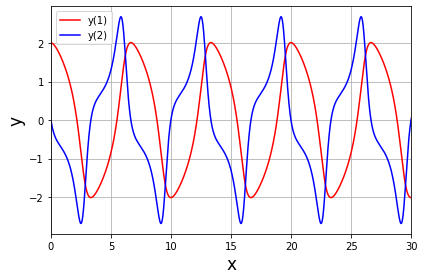

In [21]:
## solve 2nd-order differential equation ##
import matplotlib.pyplot as plt
import numpy as np


def feval(funcName, *args):
    return eval(funcName)(*args)


def RKM5thOrder(func, yinit, x_range, h):
    m = len(yinit)
    n = int((x_range[-1] - x_range[0])/h)
    
    x = x_range[0]
    y = yinit
    
    # Containers for solutions
    xsol = np.empty(0)
    xsol = np.append(xsol, x)

    ysol = np.empty(0)
    ysol = np.append(ysol, y)

    for i in range(n):
        k1 = feval(func, x, y)

        yp2 = y + k1*(h/3)

        k2 = feval(func, x+h/3, yp2)

        yp3 = y + (k1+k2)*(h/6)

        k3 = feval(func, x+h/3, yp3)

        yp4 = y + (k1+3*k3)*(h/8)

        k4 = feval(func, x+h/2, yp4)

        yp5 = y + (k1-3*k3+4*k4)*(h/2)

        k5 = feval(func, x+h, yp5)

        for j in range(m):
            y[j] = y[j] + (h/6)*(k1[j] + 4*k4[j] + k5[j])

        x = x + h
        xsol = np.append(xsol, x)

        for r in range(len(y)):
            ysol = np.append(ysol, y[r])  

    return [xsol, ysol]


def myFunc(x, y):
    # Van der Pol oscillator
    a = 1.0
    dy = np.zeros((len(y)))
    dy[0] = y[1]   #y[0]=y', y[1]=y"
    dy[1] = a*(1 - y[0]**2)*y[1] - y[0]   # ODE function y"(t)
    return dy

#---------------------------

h = 0.01
x = np.array([0.0, 30.0])   #time range
yinit = np.array([2.0, 0.0])   #initial conditions[y(t),y'(t)]


[ts, ys] = RKM5thOrder('myFunc', yinit, x, h)

node = len(yinit)
ys1 = ys[0::node]   #y(t) solution
ys2 = ys[1::node]   #y'(t) slope



plt.plot(ts, ys1, 'r')
plt.plot(ts, ys2, 'b')
plt.xlim(x[0], x[1])
plt.legend(["y(1)", "y(2)"], loc=2)
plt.xlabel('x', fontsize=17)
plt.ylabel('y', fontsize=17)
plt.tight_layout()
plt.grid('on')
plt.show()

#Uncomment the following to print the figure:
#plt.savefig('Fig_ex7_RK4th.png', dpi=600)
